# Week 05, Part 4

**NOTE:** for this class (spring 2020, online) we'll skip down to the "fish data" section. The rest of this is left as extra examples to be worked through on your own.


### Topics
  1. Simulation: Basic (skipped in online classes)
  1. Simulation: Rolling 2 die (skipped in online classes)
  1. A tangent: fitting a normal model to a distribution (skipped in online classes)
  1. Is it normal?  With fish data!

In [5]:
# resize plots
require(repr)
options(repr.plot.width=4, repr.plot.height=4,repr.plot.res=300)

## 1. Simulations: Basic (skipped in online classes)

What is the normal distribution?  What does it represent?  

We saw some examples earlier on that website, but we can also simulate our own!

First, lets do some toy examples:

In [6]:
samples = rnorm(1000, mean=0, sd=1)
print(samples)
print(length(samples))

   [1]  0.713747423 -1.076928976  0.933056000 -2.008022373 -0.092861170
   [6] -0.015476304  0.322170877  0.091539880 -1.758297143 -1.246116785
  [11] -0.314685834 -1.094484063 -0.808194915 -0.572797042 -0.216760724
  [16] -1.031874231 -0.253385175  0.206886282  0.390742748  0.838480727
  [21]  0.570160294  0.062994962 -0.470095658 -0.586142304  0.337059980
  [26] -0.463830472 -0.300030577  1.832902966 -1.709448022  0.608705989
  [31]  0.591330218  0.255233268 -0.643092382 -0.672651641  0.401418525
  [36] -1.256863791 -1.075540666 -0.272600283 -0.279314867  1.177867709
  [41]  1.800158175  0.806167216 -0.279205620 -1.345266598  0.901627195
  [46] -1.229308032  0.056909322 -0.731586908 -1.500511265 -0.049388264
  [51] -1.896033317  0.568765357 -0.567332723  1.551681818 -1.195879789
  [56]  0.131988408 -0.106198214 -0.874963668  0.287589250  0.220059445
  [61] -0.410002926 -0.936360713 -1.094870530 -0.021257995  0.966629628
  [66]  0.251161824 -1.127284255 -0.194793360  0.769127713 -0.19

[1] 1000


So, we see that we have 1000 samples.  We can first plot them with a `dotchart` plot:

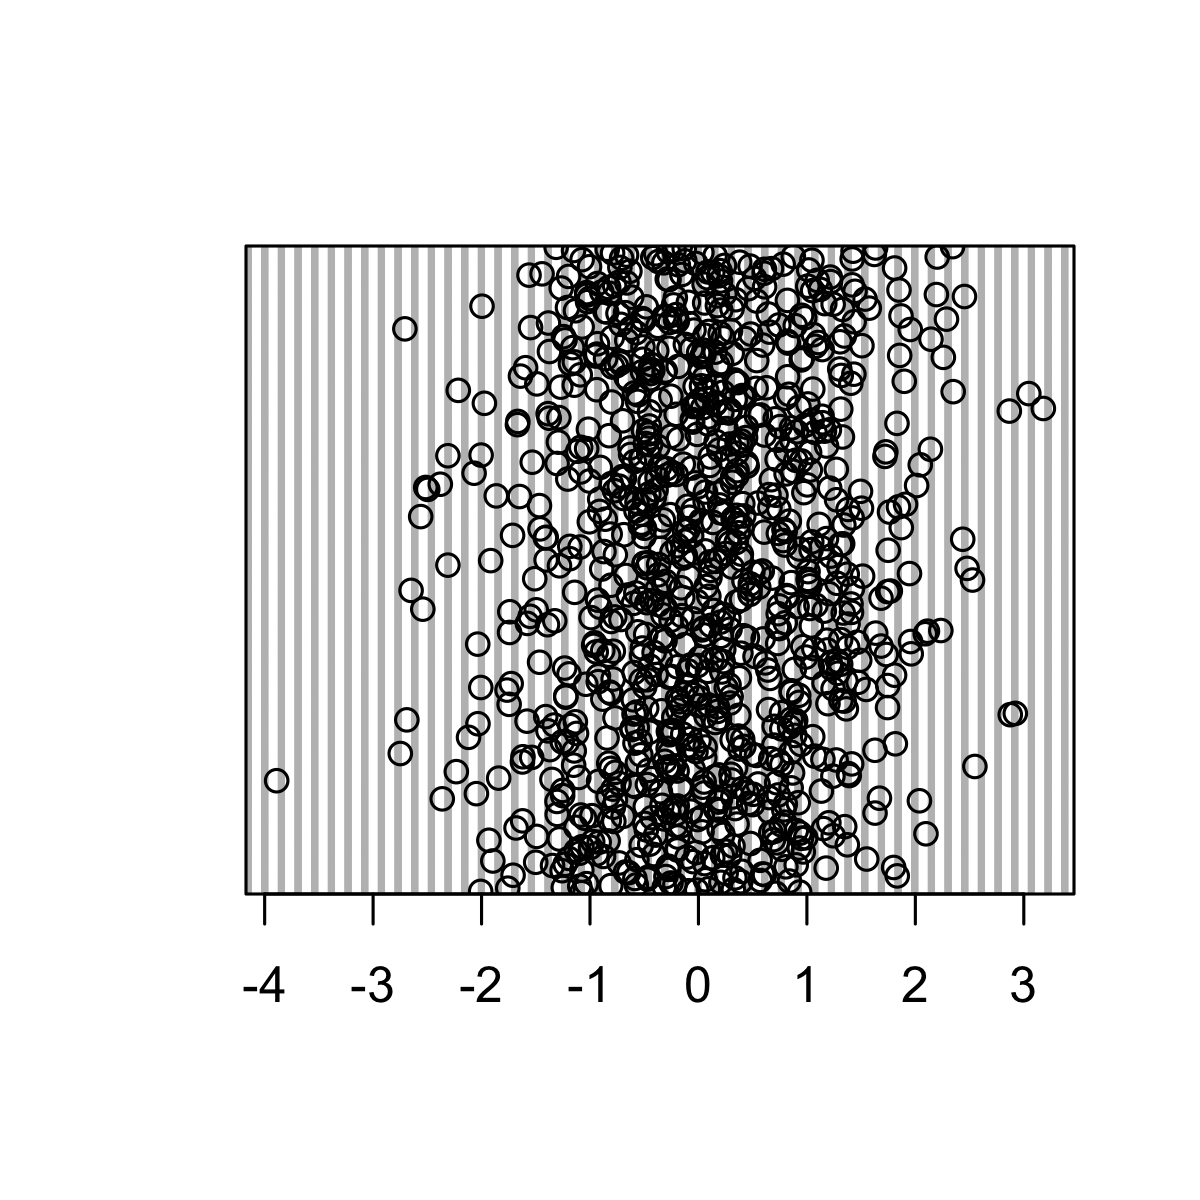

In [7]:
dotchart(samples) 

Ok, so by eye we can see a cluster around zero (our mean) and that things start falling off at like +/- 1, our SD. We can check out this distribution by building a histogram:

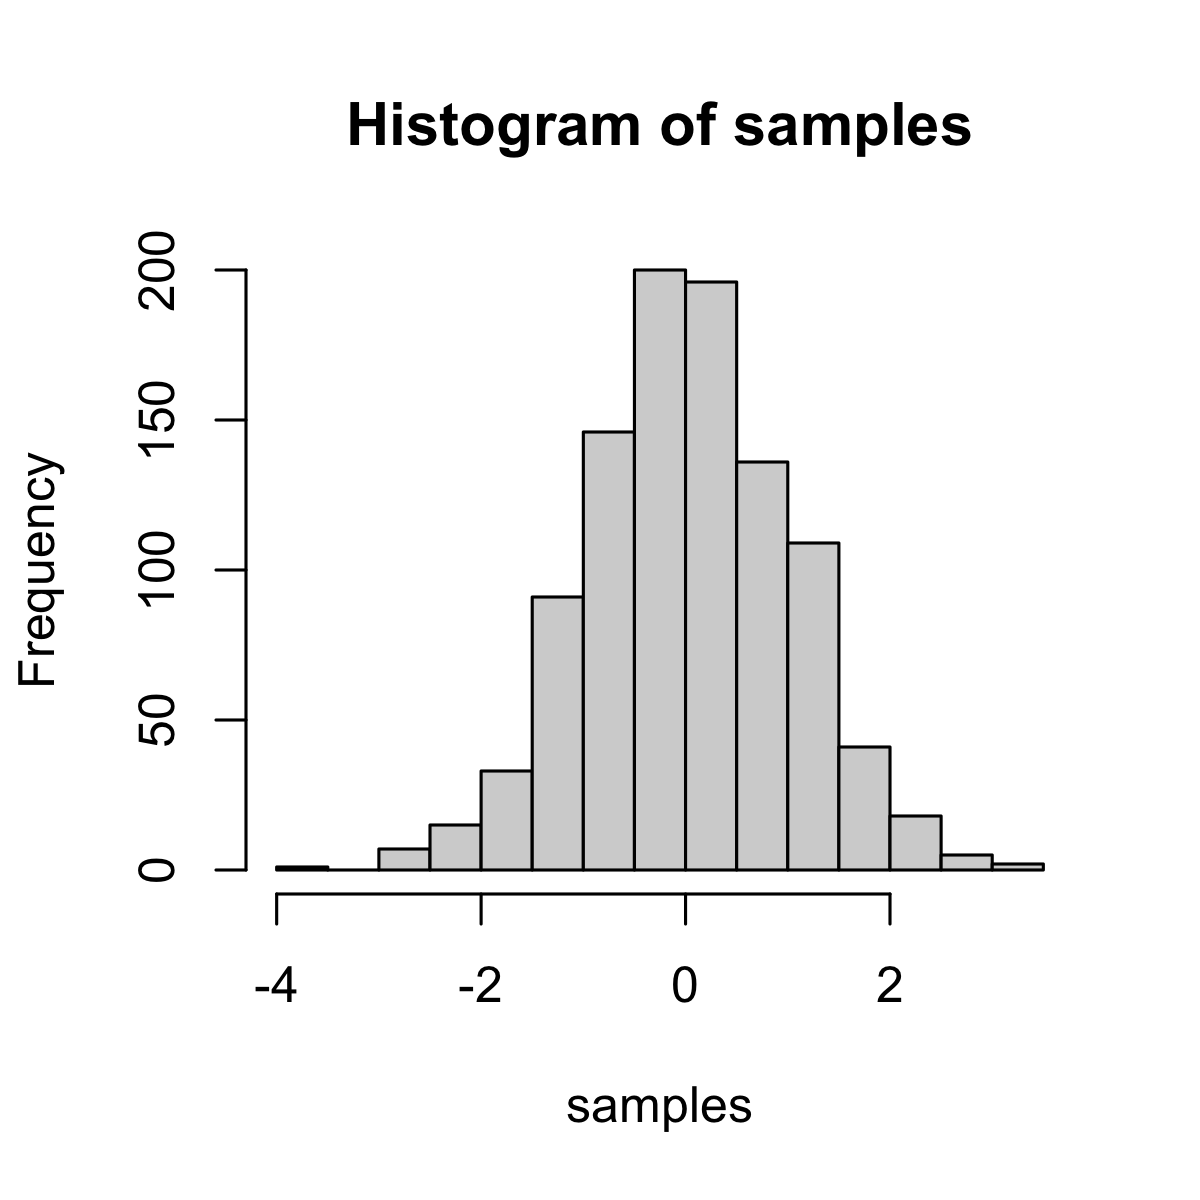

In [8]:
hist(samples)

It sure looks normal! QQ-line/QQ-norm plot:

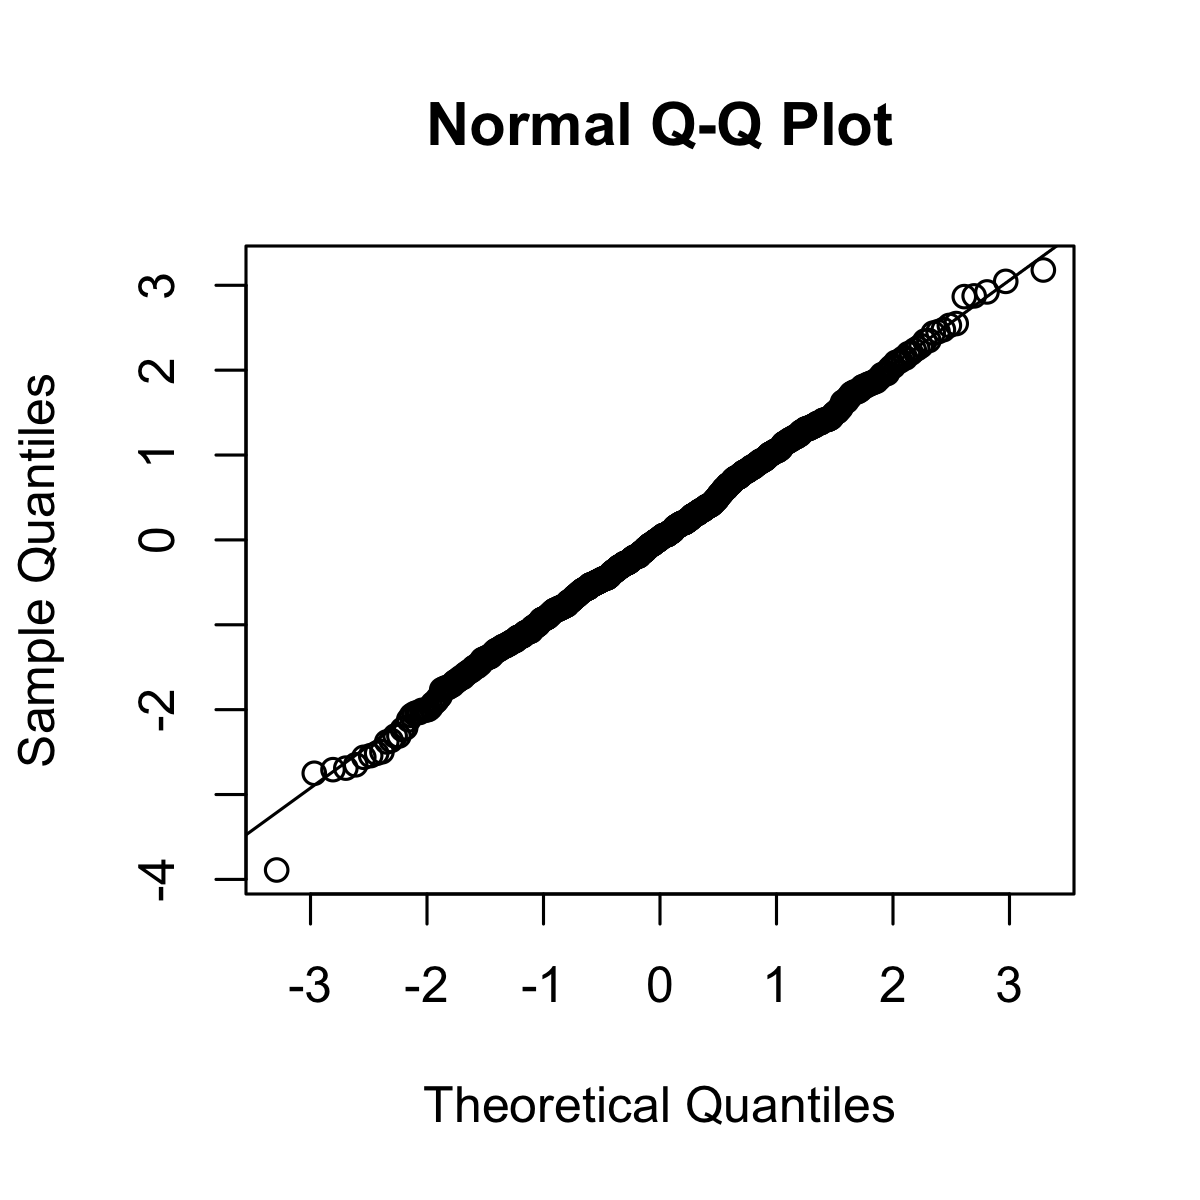

In [9]:
qqnorm(samples)
qqline(samples)

## 2. Simulation: Rolling 2 die (skipped in online classes)

We can also simulate things like 2 dice rolls to see how the sum is distributed:

In [10]:
number_of_sides = 6
number_of_throws = 100

"Throw" the dice:

In [11]:
die1 = sample(number_of_sides,number_of_throws, replace=TRUE)
die2 = sample(number_of_sides,number_of_throws, replace=TRUE)

Add the sum:

In [12]:
distrib = die1+die2

Redo all these three plots again for this new distribution:

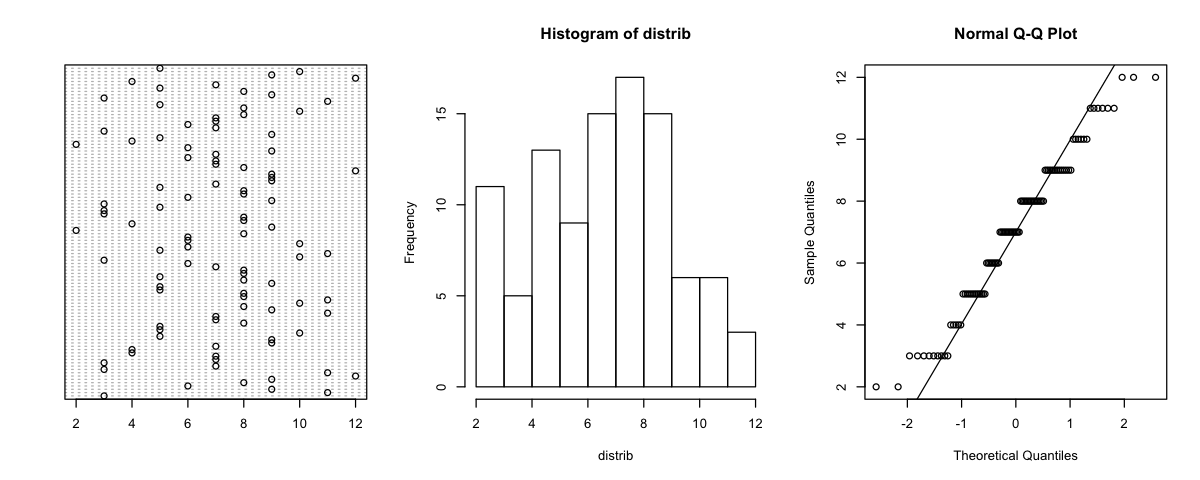

In [10]:
options(repr.plot.width=10, repr.plot.height=4)

# three plots
par(mfrow=c(1,3))

# dotchart
dotchart(distrib)

# histogram of distribution
hist(distrib)

# is it normal? qqline plot
qqnorm(distrib)
qqline(distrib)

Extra questions:
  1. how does this change with number of throws?
  1. what about sides of die?

## 3. A tangent: fitting a normal model to a distribution (skipped in online classes)

A slight tangent - fitting with a gaussian another way to guestimate if something is normal. We'll do more rigorous fitting later in the course, but just to get a taste:

In [11]:
library(MASS)
fit = fitdistr(distrib, "normal")
para = fit$estimate
print(para) # prints mean & standard deviation

    mean       sd 
7.080000 2.452264 


First, plot the distribution:

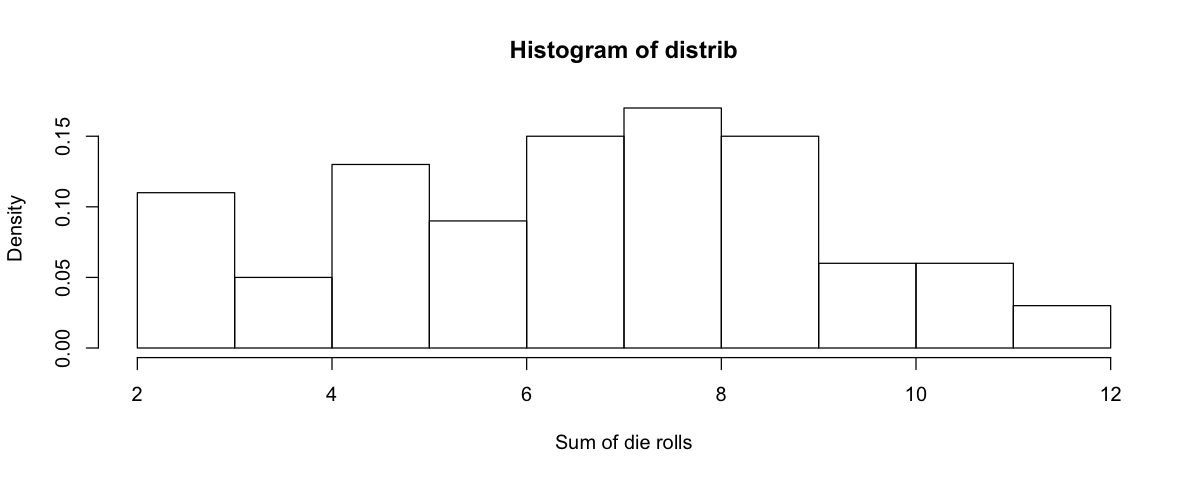

In [13]:
hist(distrib, xlab = "Sum of die rolls", prob=TRUE) # the prob=TRUE normalizes the distribution

Overplot fit:

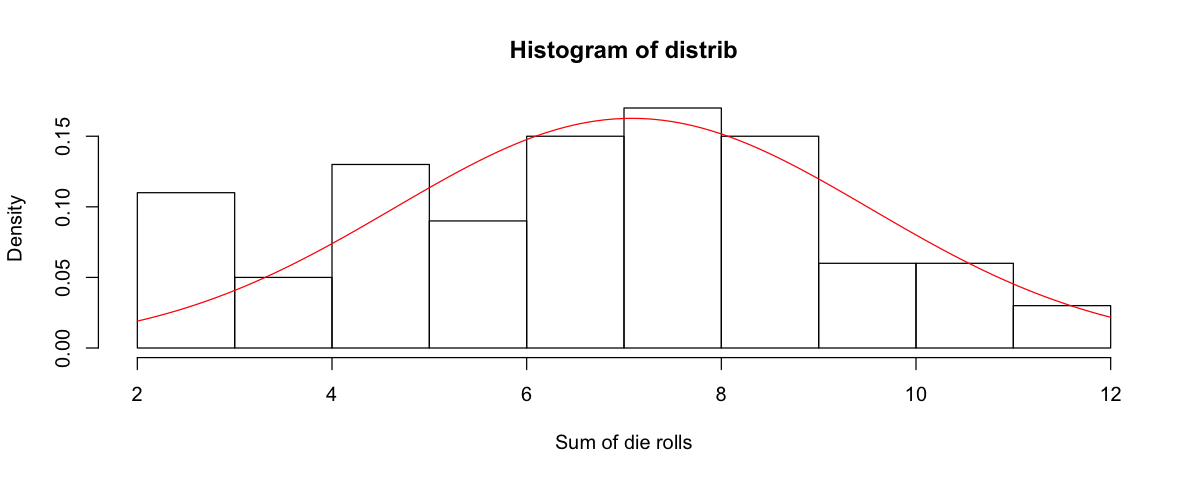

In [14]:
hist(distrib, xlab = "Sum of die rolls", prob=TRUE) # the prob=TRUE normalizes the distribution

x = seq(0,10,length=200)
# plot this fitted normal distribution
mean_fit = para[1]
sd_fit = para[2]
curve(dnorm(x, mean=mean_fit,sd=sd_fit), col = "red", add = TRUE)

Now that we have our normal distribution, we can do the same thing to it we've been doing before. For example, what is the percentile of sum = 10?

We start by plotting...

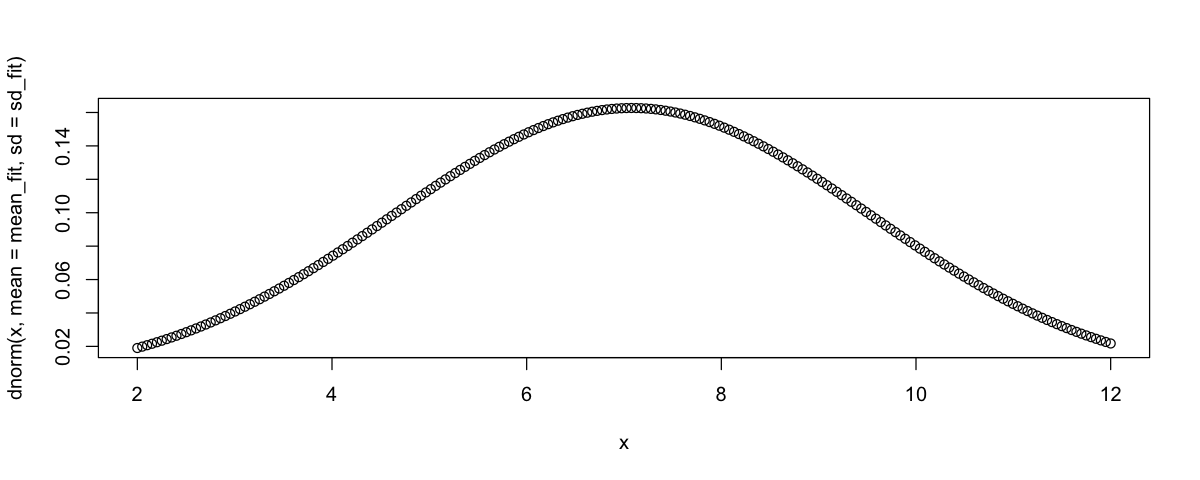

In [16]:
x=seq(2,12,length=200)
plot(x,dnorm(x,mean=mean_fit,sd=sd_fit))

Question: what are the next steps?

##   4. Is it normal?  With fish data!

Let's look back at our fish data to see if we can find anything interesting.  You'll have to recall where you've stored your fish-dataset.  Here, mine is stored in week 02:

In [18]:
fishdata = read.csv("../week02/undata_fish_2020.csv")

Let's plot some stuff:

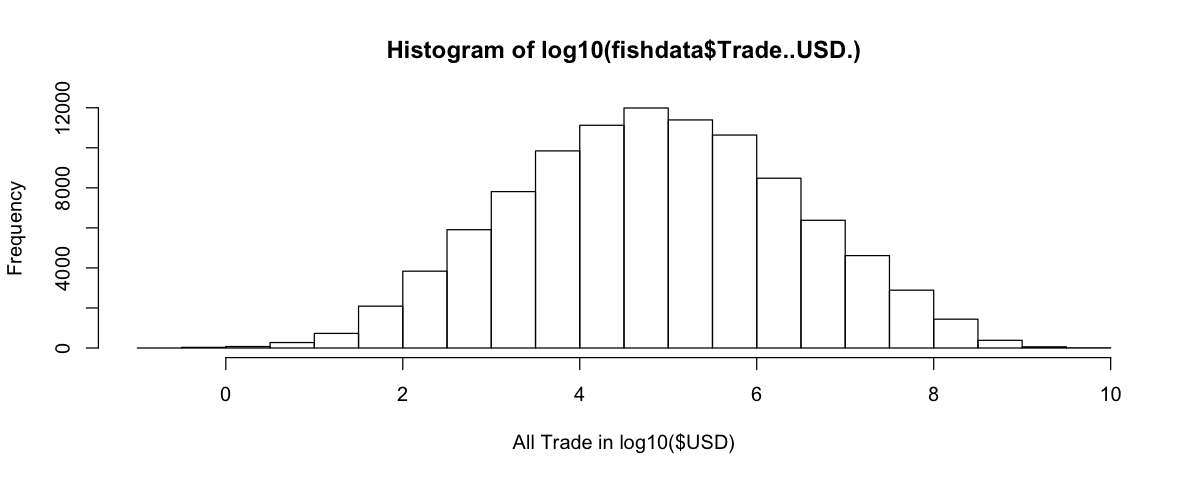

In [19]:
hist(log10(fishdata$Trade..USD.), xlab = "All Trade in log10($USD)")

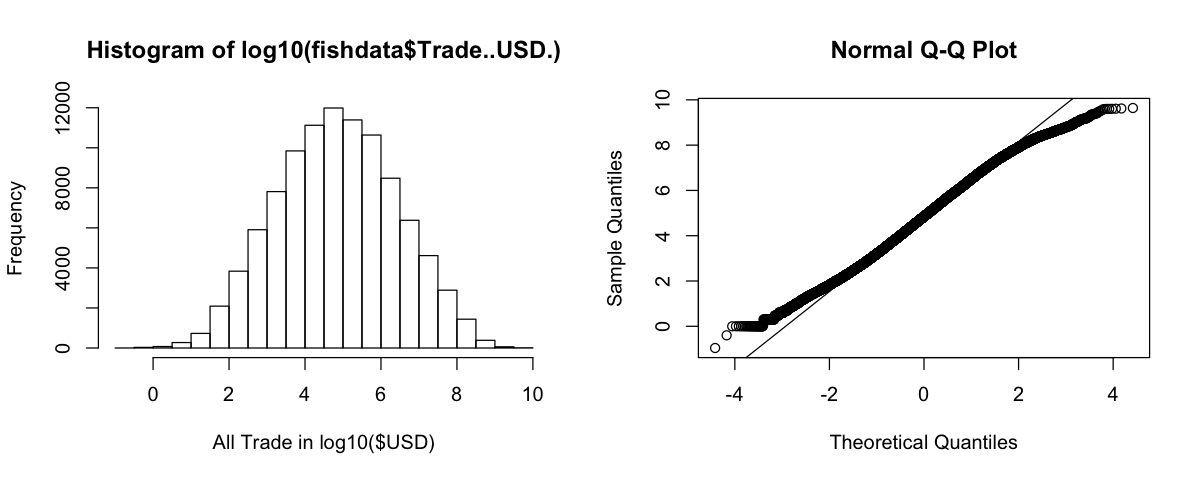

In [20]:
par(mfrow=c(1,2)) # do a 1x2 plots (2 plots per page)

# what about a log scale?
hist(log10(fishdata$Trade..USD.), xlab = "All Trade in log10($USD)")

# let's plot a QQ-Norm+QQ-Line plot:
qqnorm(log10(fishdata$Trade..USD.))
qqline(log10(fishdata$Trade..USD.))

#### Discuss: is it normal?

### Bonus:  Will probably skip below, but some fitting of a normal model



Looks like a long-tailed (wider than normal) distribution.  Let's play around with fitting a normal distribution anyway.

*NOTE:* we'll get more into the nitty-gritty of fitting things later in class

In [21]:
library(MASS)
fit <- fitdistr(log10(fishdata$Trade..USD.), "normal")
para <- fit$estimate
print(para) # prints mean & standard deviation

    mean       sd 
4.849986 1.571906 


Overplot the fit and the distribution:

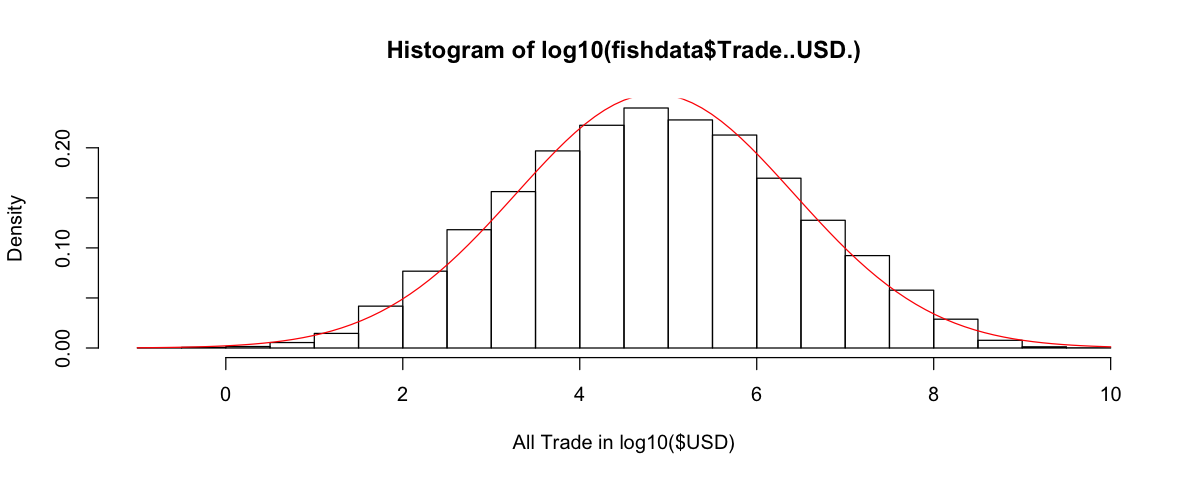

In [22]:
hist(log10(fishdata$Trade..USD.), xlab = "All Trade in log10($USD)", prob=TRUE) # the prob=TRUE normalizes the distribution

# plot this fitted normal distribution
x = seq(0,10,length=200)
curve(dnorm(x, para[1], para[2]), col = "red", add = TRUE)

Some questions you can ask (given the mean and sd of this normal distribution just calculated): 
  1. what is the probability that any trade transaction will have a value > $10^8$ dollars (USD)?
  1. what is the trade value at the 10th percentile? 40th?

**Bonus:**
  1. what other variables in this dataset are normal(ish)? What can we learn about the probability of one of their values?  Percentiles?
  1. How good are your estimates given how "normal" the distributions look?